In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.ensemble import RandomForestRegressor


In [44]:
df = pd.read_csv('/content/crop_yield.csv')


In [45]:
print("=== First 5 rows ===")
print(df.head())

=== First 5 rows ===
   soil_quality    rainfall seed_type yield_category
0      5.787214  376.596391         C            low
1      2.222101  787.223810         A            low
2      1.893720  810.077116         A         medium
3      2.879777  943.405918         C         medium
4      9.330736  224.439566         C         medium


In [46]:
print("\n=== Shape of dataset ===")
print(df.shape)



=== Shape of dataset ===
(100, 4)


In [47]:
print("\n=== Column Names ===")
print(df.columns.tolist())



=== Column Names ===
['soil_quality', 'rainfall', 'seed_type', 'yield_category']


In [48]:
print("\n=== Data Types ===")
print(df.dtypes)



=== Data Types ===
soil_quality      float64
rainfall          float64
seed_type          object
yield_category     object
dtype: object


In [49]:
print("\n=== Missing Values ===")
print(df.isnull().sum())



=== Missing Values ===
soil_quality      0
rainfall          0
seed_type         0
yield_category    0
dtype: int64


/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Figure size 1000x600 with 0 Axes>

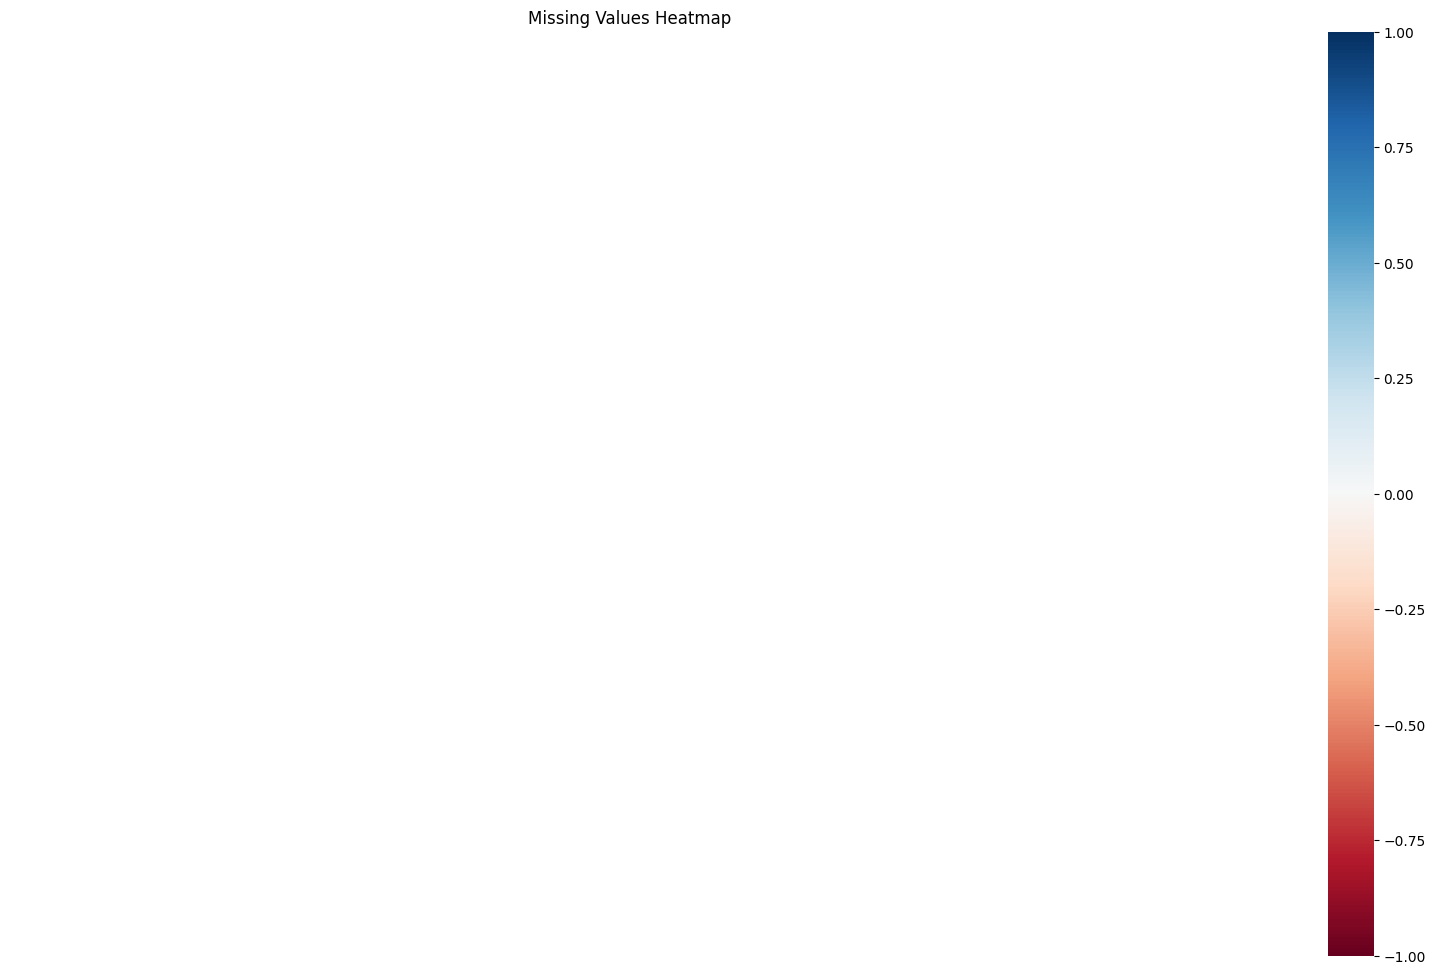

In [50]:
plt.figure(figsize=(10, 6))
msno.heatmap(df)
plt.title('Missing Values Heatmap')
plt.show()

In [51]:
print("\n=== Value Counts for Categorical Columns ===")
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"\nValue counts for {col}:")
        print(df[col].value_counts())


=== Value Counts for Categorical Columns ===

Value counts for seed_type:
seed_type
A    43
C    31
B    26
Name: count, dtype: int64

Value counts for yield_category:
yield_category
low       37
high      34
medium    29
Name: count, dtype: int64


In [52]:
print("\n=== Summary Statistics ===")
print(df.describe())




=== Summary Statistics ===
       soil_quality    rainfall
count    100.000000  100.000000
mean       5.474818  595.863760
std        2.567913  236.538036
min        1.028511  201.854038
25%        3.283863  376.302085
50%        5.406712  631.023424
75%        7.585822  786.636666
max        9.997424  995.718913


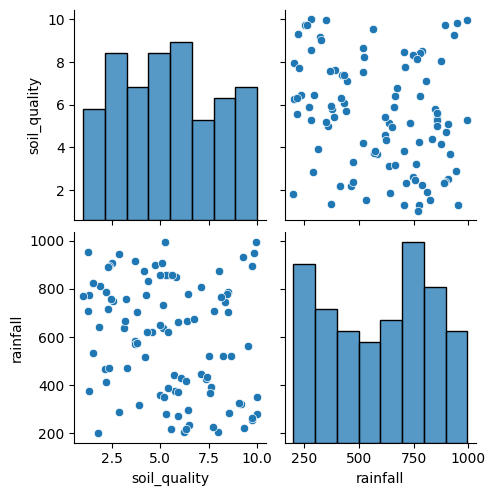

In [54]:
if len(df.columns) <= 10:
    sns.pairplot(df)
    plt.show()



In [55]:
if 'Yield' in df.columns:
    print("\n=== Feature Importance using RandomForest ===")
    # Prepare data
    X = df.drop(columns=['Yield'])
    y = df['Yield']